<a href="https://colab.research.google.com/github/wamaithaNyamu/RUNDAHOUSES/blob/master/Runda_Houses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# INTRODUCTION

Runda is a surburb in the heart of Nairobi. Its an estate of the who is who in the country. Due to the status quo of the class of citizens that live here, it is exepected that the price of land and houses are off the roof (well, from the common mwananchis perspective anyway). This notebook walks through investigating housing prices in Runda. The data has been scrapped from [BuyRentKenya](https://www.buyrentkenya.com/houses-for-sale/westlands/runda?page=1). Download the csv from [here]() .Find a step by step tutorial for the webscrapping [here](https://wamaithanyamu.com/categories/runda-houses/).



# LOAD THE DATA

First import the necessary libraries

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


We load the data from the csv file runda_houses.csv and convert it to a dataframe

In [2]:
df = pd.read_csv('/content/manually_cleaned_runda-houses.csv')
df.head(2)

,_id,url,__v,area,baths,beds,cars,description,externalFeatures,generalFeatures,internalFeatures,price
0,5f5d1a3e1e441dbaa36b1273,https://www.buyrentkenya.com/listings/6-bed-ho...,0,2428,8,6,0,\n6 bedroom houseAll rooms en-suiteSitting on ...,"[' Built in Cupboards ', ' Ensuite ', ' Kitche...","[' Balcony ', ' Fence ', ' Garden ']",[],85000000
1,5f5d1a3f1e441dbaa36b132c,https://www.buyrentkenya.com/listings/4-bed-ho...,0,6001,3,4,0,\nUnbelievable!!Yet a unique house with charac...,"[' Fence ', ' Garden ']","[' Fibre Internet ', ' Pets Allowed ']","[' Alarm ', ' Built in Cupboards ', ' Ensuite ...",75000000


In [3]:
df.tail(2)

,_id,url,__v,area,baths,beds,cars,description,externalFeatures,generalFeatures,internalFeatures,price
140,5f5d202b1e441dbaa36e9b15,https://www.buyrentkenya.com/listings/5-bed-ho...,0,0,0,5,2,\nIts a magnificent 5bdrm unfurnished ambassad...,[],[],[],140000000
141,5f5d202c1e441dbaa36e9b93,https://www.buyrentkenya.com/listings/6-bed-to...,0,0,7,6,0,\n6 Bedroom Ambassadorial House for saleAll en...,[],[],[],0


# DATA CLEANING

The data needs alot of cleaning inorder to be useful for analysis. Some values are NaN while others are None. The features are also in form of lists and some are also missing. 

### Drop unnecesaary columns

We do not need the url , _id, and the _v columns so we will drop them for they only add clutter to he data we have

In [4]:
# drop columns

df =df.drop(['_id', 'url', '__v','cars', 'description'], axis=1)
df.head(2)

,area,baths,beds,externalFeatures,generalFeatures,internalFeatures,price
0,2428,8,6,"[' Built in Cupboards ', ' Ensuite ', ' Kitche...","[' Balcony ', ' Fence ', ' Garden ']",[],85000000
1,6001,3,4,"[' Fence ', ' Garden ']","[' Fibre Internet ', ' Pets Allowed ']","[' Alarm ', ' Built in Cupboards ', ' Ensuite ...",75000000


In [5]:
df.isna().sum()

area                0
baths               0
beds                0
externalFeatures    0
generalFeatures     0
internalFeatures    0
price               0
dtype: int64

In [6]:
df.describe()

,area,baths,beds,price
count,142.000000,142.000000,142.000000,1.420000e+02
mean,1474.000000,4.739437,4.964789,1.106027e+08
std,1136.997071,2.075455,1.013469,6.002568e+07
min,0.000000,0.000000,3.000000,0.000000e+00
25%,0.000000,4.000000,4.000000,7.500000e+07
50%,2023.000000,5.000000,5.000000,9.500000e+07
75%,2024.000000,6.000000,5.000000,1.500000e+08
max,6001.000000,9.000000,8.000000,2.600000e+08


The dataset has a lot of missing values. We need to work with data that is complete or drop those that have few missing values. We check for zeros per column. In our webscraping we assigned a zero to any feature that was not listed. However, the missing data can be most likely found in the  description. 

In [7]:
# Get number if zeros per column
df.isin([0]).sum()

area                37
baths               16
beds                 0
externalFeatures     0
generalFeatures      0
internalFeatures     0
price                3
dtype: int64

In [8]:
df = df[~(df == 0).any(axis=1)]

# Quantile binning for price

Text(0, 0.5, 'Frequency')

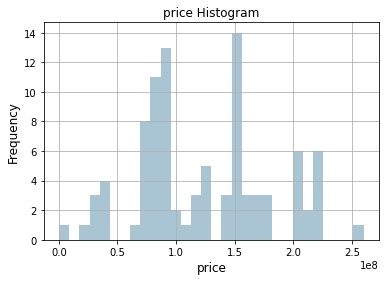

In [9]:
fig, ax = plt.subplots()
df['price'].hist(bins=30, color='#A9C5D3')
ax.set_title('price Histogram', fontsize=12)
ax.set_xlabel('price', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)



In [10]:


quantile_list = [0, .25, .5, .75, 1.]
quantiles = df['price'].quantile(quantile_list)
quantiles



0.00       340000.0
0.25     85000000.0
0.50    120000000.0
0.75    158750000.0
1.00    260000000.0
Name: price, dtype: float64

Text(0, 0.5, 'Frequency')

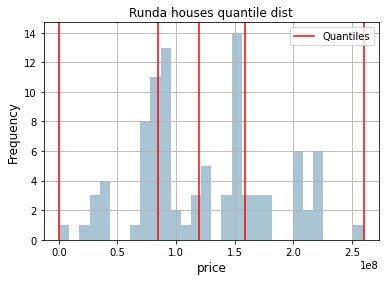

In [11]:
fig, ax = plt.subplots()
df['price'].hist(bins=30, color='#A9C5D3')

for quantile in quantiles:
    qvl = plt.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)

ax.set_title('Runda houses quantile dist', fontsize=12)
ax.set_xlabel('price', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [12]:

def transform_price(price):
    quantile_list = [0, .25, .5, .75, 1.]
    quantile_labels = ['low','fair','medium','high']

    df['price'] = pd.qcut(price,q=quantile_list, labels=quantile_labels)

transform_price(df['price'])
df.head(10)

,area,baths,beds,externalFeatures,generalFeatures,internalFeatures,price
0,2428,8,6,"[' Built in Cupboards ', ' Ensuite ', ' Kitche...","[' Balcony ', ' Fence ', ' Garden ']",[],low
1,6001,3,4,"[' Fence ', ' Garden ']","[' Fibre Internet ', ' Pets Allowed ']","[' Alarm ', ' Built in Cupboards ', ' Ensuite ...",low
3,800,5,5,"[' Balcony ', ' Bore Hole ', ' Electric Fence ...","[' Backup Generator ', ' CCTV ', ' Pets Allowe...","[' Aircon ', ' Alarm ', ' Built in Cupboards '...",low
4,2833,5,5,"[' Balcony ', ' Bore Hole ', ' Electric Fence ...","[' CCTV ', ' Electricity Included ', ' Fibre I...","[' Alarm ', ' Built in Cupboards ', ' Ensuite ...",medium
5,2023,8,8,"[' Balcony ', ' Bore Hole ', ' Electric Fence ...","[' Backup Generator ', ' CCTV ', ' Electricity...","[' Aircon ', ' Alarm ', ' Built in Cupboards '...",medium
6,2023,5,5,"[' Built in Cupboards ', ' Ensuite ', ' Kitche...","[' Balcony ', ' Fence ', ' Garden ']",[],high
7,506,4,4,"[' Bore Hole ', ' Electric Fence ', ' Fence ',...","[' Fibre Internet ', ' Pets Allowed ']","[' Alarm ', ' Built in Cupboards ', ' Ensuite ...",low
8,2023,5,5,"[' Balcony ', ' Bore Hole ', ' Electric Fence ...","[' Backup Generator ', ' CCTV ', ' Electricity...","[' Aircon ', ' Alarm ', ' Built in Cupboards '...",high
9,2833,7,5,"[' Bore Hole ', ' Electric Fence ', ' Garden ']","[' Backup Generator ', ' CCTV ', ' Pets Allowe...","[' Built in Cupboards ', ' Ensuite ', ' Kitche...",fair
11,2427,6,6,"[' Balcony ', ' Electric Fence ', ' Fence ', '...","[' Backup Generator ', ' CCTV ', ' Electricity...","[' Aircon ', ' Alarm ', ' Built in Cupboards '...",low


In [13]:
df= df[df['area'] != 0]
df= df[df['baths'] != 0]
df= df[df['beds'] != 0]
df.head(10)

,area,baths,beds,externalFeatures,generalFeatures,internalFeatures,price
0,2428,8,6,"[' Built in Cupboards ', ' Ensuite ', ' Kitche...","[' Balcony ', ' Fence ', ' Garden ']",[],low
1,6001,3,4,"[' Fence ', ' Garden ']","[' Fibre Internet ', ' Pets Allowed ']","[' Alarm ', ' Built in Cupboards ', ' Ensuite ...",low
3,800,5,5,"[' Balcony ', ' Bore Hole ', ' Electric Fence ...","[' Backup Generator ', ' CCTV ', ' Pets Allowe...","[' Aircon ', ' Alarm ', ' Built in Cupboards '...",low
4,2833,5,5,"[' Balcony ', ' Bore Hole ', ' Electric Fence ...","[' CCTV ', ' Electricity Included ', ' Fibre I...","[' Alarm ', ' Built in Cupboards ', ' Ensuite ...",medium
5,2023,8,8,"[' Balcony ', ' Bore Hole ', ' Electric Fence ...","[' Backup Generator ', ' CCTV ', ' Electricity...","[' Aircon ', ' Alarm ', ' Built in Cupboards '...",medium
6,2023,5,5,"[' Built in Cupboards ', ' Ensuite ', ' Kitche...","[' Balcony ', ' Fence ', ' Garden ']",[],high
7,506,4,4,"[' Bore Hole ', ' Electric Fence ', ' Fence ',...","[' Fibre Internet ', ' Pets Allowed ']","[' Alarm ', ' Built in Cupboards ', ' Ensuite ...",low
8,2023,5,5,"[' Balcony ', ' Bore Hole ', ' Electric Fence ...","[' Backup Generator ', ' CCTV ', ' Electricity...","[' Aircon ', ' Alarm ', ' Built in Cupboards '...",high
9,2833,7,5,"[' Bore Hole ', ' Electric Fence ', ' Garden ']","[' Backup Generator ', ' CCTV ', ' Pets Allowe...","[' Built in Cupboards ', ' Ensuite ', ' Kitche...",fair
11,2427,6,6,"[' Balcony ', ' Electric Fence ', ' Fence ', '...","[' Backup Generator ', ' CCTV ', ' Electricity...","[' Aircon ', ' Alarm ', ' Built in Cupboards '...",low


In [14]:

def transform_beds(beds):
    bin_ranges = [2,4,6,8]
    bin_names = [ '2-4 bedrooms','4-6 bedrooms','6-8 bedrooms']

    df['beds'] = pd.cut(np.array(beds),   bins=bin_ranges, labels=bin_names)


transform_beds(df['beds'])

In [15]:

def transform_baths(baths):
    bin_ranges = [2,4,6,8]
    bin_names = [ '2-4 baths','4-6 baths','6-8 baths']

    df['baths'] = pd.cut(np.array(baths),bins=bin_ranges, labels=bin_names)



transform_baths(df['baths'])

In [16]:

def transform_area(area):
    bin_ranges = [500,1000,1500,2000 , 2500,3000]
    bin_names = [ '500 - 1000','1000-1500','1500-2000','2000-2500','2500-3000']

    df['area'] = pd.cut(np.array(area), bins=bin_ranges, labels=bin_names)



transform_area(df['area'])

In [17]:
df.isna().sum()

area                8
baths               1
beds                0
externalFeatures    0
generalFeatures     0
internalFeatures    0
price               0
dtype: int64

In [18]:
df = df.dropna()

# One hot encoding of features

In [19]:
# convert to lists
from ast import literal_eval
df.loc[:,'generalFeatures'] = df.loc[:,'generalFeatures'].apply(lambda x: literal_eval(x))
df.loc[:,'internalFeatures'] = df.loc[:,'internalFeatures'].apply(lambda x: literal_eval(x))
df.loc[:,'externalFeatures'] = df.loc[:,'externalFeatures'].apply(lambda x: literal_eval(x))

In [20]:
all_features =set([]) 

def get_all_features(text):
  for i in range(len(text)):
  
   all_features.add(text[i].strip())


for i in range(len(df)):
  get_all_features(df['generalFeatures'].tolist()[i])
  get_all_features(df['internalFeatures'].tolist()[i])
  get_all_features(df['externalFeatures'].tolist()[i])



print("All features ", type(all_features),  all_features)


All features  <class 'set'> {'Built in Cupboards', 'Scenic View', 'Alarm', 'Kitchen', 'Balcony', 'Walk In Closet', 'Garden', 'Lift Elevator', 'Ensuite', 'Golf Course', 'Electricity Included', 'Water Included', 'Pets Allowed', 'Fence', 'Aircon', 'Bore Hole', 'Sea View', 'CCTV', 'Wheel Chair Friendly', 'Electric Fence', 'Fibre Internet', 'Backup Generator'}


We first need to turn the features to individual column names with intial values of zero. Then iterate trhough the df giving a 1 to a house that has a feature.

In [21]:
# turn all features to column names
for feature in all_features:
  df[feature] = [0] * len(df)
 
df.head(12)  

,area,baths,beds,externalFeatures,generalFeatures,internalFeatures,price,Built in Cupboards,Scenic View,Alarm,Kitchen,Balcony,Walk In Closet,Garden,Lift Elevator,Ensuite,Golf Course,Electricity Included,Water Included,Pets Allowed,Fence,Aircon,Bore Hole,Sea View,CCTV,Wheel Chair Friendly,Electric Fence,Fibre Internet,Backup Generator
0,2000-2500,6-8 baths,4-6 bedrooms,"[ Built in Cupboards , Ensuite , Kitchen ]","[ Balcony , Fence , Garden ]",[],low,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,500 - 1000,4-6 baths,4-6 bedrooms,"[ Balcony , Bore Hole , Electric Fence , Fe...","[ Backup Generator , CCTV , Pets Allowed , ...","[ Aircon , Alarm , Built in Cupboards , Ens...",low,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2500-3000,4-6 baths,4-6 bedrooms,"[ Balcony , Bore Hole , Electric Fence , Fe...","[ CCTV , Electricity Included , Fibre Intern...","[ Alarm , Built in Cupboards , Ensuite , Ki...",medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2000-2500,6-8 baths,6-8 bedrooms,"[ Balcony , Bore Hole , Electric Fence , Fe...","[ Backup Generator , CCTV , Electricity Incl...","[ Aircon , Alarm , Built in Cupboards , Ens...",medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2000-2500,4-6 baths,4-6 bedrooms,"[ Built in Cupboards , Ensuite , Kitchen ]","[ Balcony , Fence , Garden ]",[],high,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,500 - 1000,2-4 baths,2-4 bedrooms,"[ Bore Hole , Electric Fence , Fence , Gard...","[ Fibre Internet , Pets Allowed ]","[ Alarm , Built in Cupboards , Ensuite , Ki...",low,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,2000-2500,4-6 baths,4-6 bedrooms,"[ Balcony , Bore Hole , Electric Fence , Fe...","[ Backup Generator , CCTV , Electricity Incl...","[ Aircon , Alarm , Built in Cupboards , Ens...",high,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,2500-3000,6-8 baths,4-6 bedrooms,"[ Bore Hole , Electric Fence , Garden ]","[ Backup Generator , CCTV , Pets Allowed ]","[ Built in Cupboards , Ensuite , Kitchen ]",fair,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,2000-2500,4-6 baths,4-6 bedrooms,"[ Balcony , Electric Fence , Fence , Garden ]","[ Backup Generator , CCTV , Electricity Incl...","[ Aircon , Alarm , Built in Cupboards , Ens...",low,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,2500-3000,4-6 baths,4-6 bedrooms,"[ Balcony , Bore Hole , Electric Fence , Fe...","[ Backup Generator , CCTV , Pets Allowed ]","[ Alarm , Built in Cupboards , Ensuite , Ki...",medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
df.head(10)

,area,baths,beds,externalFeatures,generalFeatures,internalFeatures,price,Built in Cupboards,Scenic View,Alarm,Kitchen,Balcony,Walk In Closet,Garden,Lift Elevator,Ensuite,Golf Course,Electricity Included,Water Included,Pets Allowed,Fence,Aircon,Bore Hole,Sea View,CCTV,Wheel Chair Friendly,Electric Fence,Fibre Internet,Backup Generator
0,2000-2500,6-8 baths,4-6 bedrooms,"[ Built in Cupboards , Ensuite , Kitchen ]","[ Balcony , Fence , Garden ]",[],low,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,500 - 1000,4-6 baths,4-6 bedrooms,"[ Balcony , Bore Hole , Electric Fence , Fe...","[ Backup Generator , CCTV , Pets Allowed , ...","[ Aircon , Alarm , Built in Cupboards , Ens...",low,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2500-3000,4-6 baths,4-6 bedrooms,"[ Balcony , Bore Hole , Electric Fence , Fe...","[ CCTV , Electricity Included , Fibre Intern...","[ Alarm , Built in Cupboards , Ensuite , Ki...",medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2000-2500,6-8 baths,6-8 bedrooms,"[ Balcony , Bore Hole , Electric Fence , Fe...","[ Backup Generator , CCTV , Electricity Incl...","[ Aircon , Alarm , Built in Cupboards , Ens...",medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2000-2500,4-6 baths,4-6 bedrooms,"[ Built in Cupboards , Ensuite , Kitchen ]","[ Balcony , Fence , Garden ]",[],high,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,500 - 1000,2-4 baths,2-4 bedrooms,"[ Bore Hole , Electric Fence , Fence , Gard...","[ Fibre Internet , Pets Allowed ]","[ Alarm , Built in Cupboards , Ensuite , Ki...",low,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,2000-2500,4-6 baths,4-6 bedrooms,"[ Balcony , Bore Hole , Electric Fence , Fe...","[ Backup Generator , CCTV , Electricity Incl...","[ Aircon , Alarm , Built in Cupboards , Ens...",high,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,2500-3000,6-8 baths,4-6 bedrooms,"[ Bore Hole , Electric Fence , Garden ]","[ Backup Generator , CCTV , Pets Allowed ]","[ Built in Cupboards , Ensuite , Kitchen ]",fair,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,2000-2500,4-6 baths,4-6 bedrooms,"[ Balcony , Electric Fence , Fence , Garden ]","[ Backup Generator , CCTV , Electricity Incl...","[ Aircon , Alarm , Built in Cupboards , Ens...",low,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,2500-3000,4-6 baths,4-6 bedrooms,"[ Balcony , Bore Hole , Electric Fence , Fe...","[ Backup Generator , CCTV , Pets Allowed ]","[ Alarm , Built in Cupboards , Ensuite , Ki...",medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
def populate_feature( j, text):
   for i in range(len(text)):
     a = text[i].strip()
   
     df[a][j] = 1

for i in range(len(df)):
  populate_feature(i ,df['generalFeatures'].tolist()[i])
  populate_feature(i , df['internalFeatures'].tolist()[i])
  populate_feature(i ,df['externalFeatures'].tolist()[i])

df.head(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,area,baths,beds,externalFeatures,generalFeatures,internalFeatures,price,Built in Cupboards,Scenic View,Alarm,Kitchen,Balcony,Walk In Closet,Garden,Lift Elevator,Ensuite,Golf Course,Electricity Included,Water Included,Pets Allowed,Fence,Aircon,Bore Hole,Sea View,CCTV,Wheel Chair Friendly,Electric Fence,Fibre Internet,Backup Generator
0,2000-2500,6-8 baths,4-6 bedrooms,"[ Built in Cupboards , Ensuite , Kitchen ]","[ Balcony , Fence , Garden ]",[],low,1,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,500 - 1000,4-6 baths,4-6 bedrooms,"[ Balcony , Bore Hole , Electric Fence , Fe...","[ Backup Generator , CCTV , Pets Allowed , ...","[ Aircon , Alarm , Built in Cupboards , Ens...",low,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [24]:
df = df.drop(['externalFeatures','generalFeatures','internalFeatures'], axis=1)

# Model

In [25]:
df.shape

(85, 26)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 136
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   area                  85 non-null     category
 1   baths                 85 non-null     category
 2   beds                  85 non-null     category
 3   price                 85 non-null     category
 4   Built in Cupboards    85 non-null     int64   
 5   Scenic View           85 non-null     int64   
 6   Alarm                 85 non-null     int64   
 7   Kitchen               85 non-null     int64   
 8   Balcony               85 non-null     int64   
 9   Walk In Closet        85 non-null     int64   
 10  Garden                85 non-null     int64   
 11  Lift Elevator         85 non-null     int64   
 12  Ensuite               85 non-null     int64   
 13  Golf Course           85 non-null     int64   
 14  Electricity Included  85 non-null     int64   
 15  Water I

In [27]:
from sklearn.preprocessing import LabelEncoder


def encoding(price, beds,baths,area):
    LE = LabelEncoder()
    df['price'] = LE.fit_transform(price)
    df['beds'] = LE.fit_transform(beds)
    df['baths'] = LE.fit_transform(baths)
    df['area'] = LE.fit_transform(area)
    df.info()

encoding(df['price'],df['beds'],df['baths'],df['area'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 136
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   area                  85 non-null     int64
 1   baths                 85 non-null     int64
 2   beds                  85 non-null     int64
 3   price                 85 non-null     int64
 4   Built in Cupboards    85 non-null     int64
 5   Scenic View           85 non-null     int64
 6   Alarm                 85 non-null     int64
 7   Kitchen               85 non-null     int64
 8   Balcony               85 non-null     int64
 9   Walk In Closet        85 non-null     int64
 10  Garden                85 non-null     int64
 11  Lift Elevator         85 non-null     int64
 12  Ensuite               85 non-null     int64
 13  Golf Course           85 non-null     int64
 14  Electricity Included  85 non-null     int64
 15  Water Included        85 non-null     int64
 16  Pets Allo

In [28]:
df.head(10)

,area,baths,beds,price,Built in Cupboards,Scenic View,Alarm,Kitchen,Balcony,Walk In Closet,Garden,Lift Elevator,Ensuite,Golf Course,Electricity Included,Water Included,Pets Allowed,Fence,Aircon,Bore Hole,Sea View,CCTV,Wheel Chair Friendly,Electric Fence,Fibre Internet,Backup Generator
0,2,2,1,2,1,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,4,1,1,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,3,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2,2,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
7,4,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
9,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,2,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,3,1,1,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [29]:
df.rename(columns={'price': 'Class'}, inplace=True)

In [30]:
df.head(10)

,area,baths,beds,Class,Built in Cupboards,Scenic View,Alarm,Kitchen,Balcony,Walk In Closet,Garden,Lift Elevator,Ensuite,Golf Course,Electricity Included,Water Included,Pets Allowed,Fence,Aircon,Bore Hole,Sea View,CCTV,Wheel Chair Friendly,Electric Fence,Fibre Internet,Backup Generator
0,2,2,1,2,1,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,4,1,1,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,3,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2,2,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
7,4,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
9,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,2,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,3,1,1,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [31]:
df.isna().sum()

area                    0
baths                   0
beds                    0
Class                   0
Built in Cupboards      0
Scenic View             0
Alarm                   0
Kitchen                 0
Balcony                 0
Walk In Closet          0
Garden                  0
Lift Elevator           0
Ensuite                 0
Golf Course             0
Electricity Included    0
Water Included          0
Pets Allowed            0
Fence                   0
Aircon                  0
Bore Hole               0
Sea View                0
CCTV                    0
Wheel Chair Friendly    0
Electric Fence          0
Fibre Internet          0
Backup Generator        0
dtype: int64

In [32]:
df.isnull().sum()

area                    0
baths                   0
beds                    0
Class                   0
Built in Cupboards      0
Scenic View             0
Alarm                   0
Kitchen                 0
Balcony                 0
Walk In Closet          0
Garden                  0
Lift Elevator           0
Ensuite                 0
Golf Course             0
Electricity Included    0
Water Included          0
Pets Allowed            0
Fence                   0
Aircon                  0
Bore Hole               0
Sea View                0
CCTV                    0
Wheel Chair Friendly    0
Electric Fence          0
Fibre Internet          0
Backup Generator        0
dtype: int64

# SPLIT

In [33]:
from sklearn.model_selection import train_test_split
new_cols = [col for col in df.columns if col != 'Class'] + ['Class']
df = df[new_cols]
df.head(4)

,area,baths,beds,Built in Cupboards,Scenic View,Alarm,Kitchen,Balcony,Walk In Closet,Garden,Lift Elevator,Ensuite,Golf Course,Electricity Included,Water Included,Pets Allowed,Fence,Aircon,Bore Hole,Sea View,CCTV,Wheel Chair Friendly,Electric Fence,Fibre Internet,Backup Generator,Class
0,2,2,1,1,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,2
3,4,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,2
4,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
5,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [34]:
df.shape

(85, 26)

In [35]:
x= df.iloc[:,0:25].values.astype(int)
y= df.iloc[:,25].values.astype(int)

In [36]:
x.shape

(85, 25)

In [37]:
y.shape

(85,)

In [38]:
y.reshape(1,-1)
y.shape

(85,)

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=np.random.seed(7))

In [40]:
len(x_train)
x_train.shape

(68, 25)

In [41]:
x_train

array([[2, 0, 0, ..., 0, 0, 0],
       [2, 1, 1, ..., 0, 0, 0],
       [2, 1, 1, ..., 0, 0, 0],
       ...,
       [2, 0, 0, ..., 0, 0, 0],
       [2, 1, 1, ..., 0, 0, 0],
       [4, 1, 1, ..., 0, 0, 0]])

In [42]:
len(y_train)

68

In [43]:
y_train.shape

(68,)

In [44]:
# from sklearn.preprocessing import StandardScaler
# # normalise
# sc = StandardScaler()
# x_train = sc.fit_transform(x_train)
# x_test = sc.transform(x_test)

In [45]:
pip install wandb

     |████████████████████████████████| 1.6MB 2.9MB/s 
     |████████████████████████████████| 163kB 19.8MB/s 
     |████████████████████████████████| 102kB 8.1MB/s 
     |████████████████████████████████| 102kB 8.2MB/s 
     |████████████████████████████████| 122kB 19.6MB/s 
     |████████████████████████████████| 71kB 7.2MB/s 
  Created wheel for watchdog: filename=watchdog-0.10.3-cp36-none-any.whl size=73873 sha256=51ffd066160e4452f3415ddb27091d3f34b2d3f967ad8df6a0b8d667b3d04bf0
  Stored in directory: /root/.cache/pip/wheels/a8/1d/38/2c19bb311f67cc7b4d07a2ec5ea36ab1a0a0ea50db994a5bc7
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp36-none-any.whl size=6489 sha256=27b25cd78e1510d00a4b793f05dc2bd9a7bc4e12bd9a2ffabde9ea5d688769bf
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
  Created wheel for pathtools: filename=pathtools-0.1.2-cp36-none-any.whl size=8785 sha256=3b06ff7d9721a23476c4a9394cf642e88a529ca601950c

# Logistic Regression

In [46]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support,classification_report
from sklearn.linear_model import LogisticRegression
import wandb
import time


In [47]:
def train_eval_pipeline(model,train_data,test_data,name):
  #Initialize Weights and Biases 
  wandb.init(project="Logistic Example Using Runda Houses Manually Cleaned Dataset", name=name)
  #segregate the datasets
  (x_train,y_train)=train_data
  (x_test,y_test)=test_data
 
  # train and log all the necessary metrics
  start=time.time()
  model = model.fit(x_train,y_train)
  end=time.time()-start
  prediction=model.predict(x_test)
 
  wandb.log({"accuracy": accuracy_score(y_test,prediction)*100.0,
             "precision": precision_recall_fscore_support(y_test,prediction,average='macro')[0],
             'recall': precision_recall_fscore_support(y_test,prediction,average='macro')[1],
             'Training_time':end})
  print("Accuracy score of the Logistic Regression Classifier with default hyperparameter values {0:.2f}%"\
  .format(accuracy_score(y_test,prediction)*100.0))
  print('\n')
  print("---Classification report of the Logistic Regression classifier with default hyperparameter values----")
  print('\n')
  print(classification_report(y_test,prediction,target_names=['low ','fair ', 'medium', 'overpriced'])) 

  return model

In [48]:
logreg = LogisticRegression()

In [49]:
model = train_eval_pipeline(logreg,(x_train, y_train),(x_test,y_test),'Logisitc_regression')

<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: wamaitha (use `wandb login --relogin` to force relogin)
wandb: Tracking run with wandb version 0.10.2
wandb: Run data is saved locally in wandb/run-20200925_081648-1easdpzd
wandb: Syncing run Logisitc_regression



Accuracy score of the Logistic Regression Classifier with default hyperparameter values 41.18%


---Classification report of the Logistic Regression classifier with default hyperparameter values----


              precision    recall  f1-score   support

        low        0.00      0.00      0.00         4
       fair        0.50      0.43      0.46         7
      medium       1.00      0.50      0.67         4
  overpriced       0.22      1.00      0.36         2

    accuracy                           0.41        17
   macro avg       0.43      0.48      0.37        17
weighted avg       0.47      0.41      0.39        17



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
df.head(20)

,area,baths,beds,Built in Cupboards,Scenic View,Alarm,Kitchen,Balcony,Walk In Closet,Garden,Lift Elevator,Ensuite,Golf Course,Electricity Included,Water Included,Pets Allowed,Fence,Aircon,Bore Hole,Sea View,CCTV,Wheel Chair Friendly,Electric Fence,Fibre Internet,Backup Generator,Class
0,2,2,1,1,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,2
3,4,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,2
4,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
5,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
6,2,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
7,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
8,2,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
9,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
12,3,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,3


In [51]:
# import gridsearchcv
from sklearn.model_selection import RandomizedSearchCV

In [52]:
penalty = ['l2']

C = [0.8, 0.9, 1.0]

tol = [0.01, 0.001,0.0001]

max_iter = [100,150,200,250]

# create a dictionary where tol and max_iter are keys and the list of their values are the corresponding values

param_grid = dict(penalty=penalty, C=C, max_iter=max_iter)

param_grid

{'C': [0.8, 0.9, 1.0], 'max_iter': [100, 150, 200, 250], 'penalty': ['l2']}

In [53]:
# Instanstiate a random searcg with the required param
random_model = RandomizedSearchCV(estimator=logreg , param_distributions=param_grid, cv=5)

In [54]:
random_model

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.8, 0.9, 1.0],
                                        'max_iter': [100, 150, 200, 250],
                                        'penalty': ['l2']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
          

In [55]:
random_model_result = random_model.fit(x_train, y_train)

In [56]:
# summarised results

best_score , best_params = random_model_result.best_score_, random_model_result.best_params_
print("Best score : %.2f using %s " %(best_score*100, best_params)) 

Best score : 44.18 using {'penalty': 'l2', 'max_iter': 250, 'C': 0.9} 


In [57]:
config = wandb.config
config.tol = 0.01
config.penalty ='l2'
config.C = 0.9

In [58]:
# Train the model
logreg = LogisticRegression(tol=config.tol, penalty=config.penalty, max_iter=100,C=config.C)


In [59]:
model = train_eval_pipeline(logreg,(x_train, y_train) , (x_test, y_test), 'Logistic Regression Random Search')

wandb: Waiting for W&B process to finish, PID 206
wandb: Program ended successfully.


wandb:                                                                                
wandb: Find user logs for this run at: wandb/run-20200925_081648-1easdpzd/logs/debug.log
wandb: Find internal logs for this run at: wandb/run-20200925_081648-1easdpzd/logs/debug-internal.log
wandb: Run summary:
wandb:        accuracy 41.17647058823529
wandb:       precision 0.4305555555555556
wandb:          recall 0.48214285714285715
wandb:   Training_time 0.02456355094909668
wandb:           _step 0
wandb:        _runtime 1
wandb:      _timestamp 1601021810
wandb: Run history:
wandb:        accuracy ▁
wandb:       precision ▁
wandb:          recall ▁
wandb:   Training_time ▁
wandb:           _step ▁
wandb:        _runtime ▁
wandb:      _timestamp ▁
wandb: Synced 5 W&B file(s), 0 media file(s), 0 artifact file(s) and 0 other file(s)
wandb: 
wandb: Synced Logisitc_regression: https://wandb.ai/wamaitha/Logistic%20Example%20Using%20Runda%20Houses%20Manually%20Cleaned%20Dataset/runs/1easdpzd
wandb: Trac


Accuracy score of the Logistic Regression Classifier with default hyperparameter values 47.06%


---Classification report of the Logistic Regression classifier with default hyperparameter values----


              precision    recall  f1-score   support

        low        0.00      0.00      0.00         4
       fair        0.50      0.43      0.46         7
      medium       1.00      0.75      0.86         4
  overpriced       0.25      1.00      0.40         2

    accuracy                           0.47        17
   macro avg       0.44      0.54      0.43        17
weighted avg       0.47      0.47      0.44        17



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# PCA

In [60]:
# https://stackabuse.com/implementing-pca-in-python-with-scikit-learn/

In [61]:
from sklearn.decomposition import PCA

pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [62]:
explained_variance = pca.explained_variance_ratio_

In [63]:
explained_variance

array([4.21809202e-001, 3.59020957e-001, 8.51262772e-002, 6.49948927e-002,
       4.14595702e-002, 1.01994900e-002, 9.19524306e-003, 8.19436786e-003,
       7.85799143e-034, 7.92400544e-035, 5.04248689e-035, 1.99342094e-036,
       4.90301218e-038, 3.44563977e-061, 1.03925903e-066, 3.66663312e-069,
       5.79392018e-071, 7.01488072e-094, 6.56023231e-102, 4.35204666e-128,
       8.76269769e-135, 2.09683735e-167, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000])

In [64]:
pcamodel = train_eval_pipeline(logreg,(x_train, y_train) , (x_test, y_test), 'Logistic Regression PCA ALL')

wandb: Waiting for W&B process to finish, PID 244
wandb: Program ended successfully.


wandb:                                                                                
wandb: Find user logs for this run at: wandb/run-20200925_081651-w4hgavgk/logs/debug.log
wandb: Find internal logs for this run at: wandb/run-20200925_081651-w4hgavgk/logs/debug-internal.log
wandb: Run summary:
wandb:        accuracy 47.05882352941176
wandb:       precision 0.4375
wandb:          recall 0.5446428571428572
wandb:   Training_time 0.020570039749145508
wandb:           _step 0
wandb:        _runtime 0
wandb:      _timestamp 1601021815
wandb: Run history:
wandb:        accuracy ▁
wandb:       precision ▁
wandb:          recall ▁
wandb:   Training_time ▁
wandb:           _step ▁
wandb:        _runtime ▁
wandb:      _timestamp ▁
wandb: Synced 5 W&B file(s), 0 media file(s), 0 artifact file(s) and 0 other file(s)
wandb: 
wandb: Synced Logistic Regression Random Search: https://wandb.ai/wamaitha/Logistic%20Example%20Using%20Runda%20Houses%20Manually%20Cleaned%20Dataset/runs/w4hgavgk
wandb: Tr


Accuracy score of the Logistic Regression Classifier with default hyperparameter values 47.06%


---Classification report of the Logistic Regression classifier with default hyperparameter values----


              precision    recall  f1-score   support

        low        0.00      0.00      0.00         4
       fair        0.50      0.43      0.46         7
      medium       1.00      0.75      0.86         4
  overpriced       0.25      1.00      0.40         2

    accuracy                           0.47        17
   macro avg       0.44      0.54      0.43        17
weighted avg       0.47      0.47      0.44        17



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [66]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.4218092])

In [67]:
train_eval_pipeline(logreg,(x_train, y_train) , (x_test, y_test), 'Logistic Regression PCA ALL')

wandb: Waiting for W&B process to finish, PID 275
wandb: Program ended successfully.


wandb:                                                                                
wandb: Find user logs for this run at: wandb/run-20200925_081655-12s1s071/logs/debug.log
wandb: Find internal logs for this run at: wandb/run-20200925_081655-12s1s071/logs/debug-internal.log
wandb: Run summary:
wandb:        accuracy 47.05882352941176
wandb:       precision 0.4375
wandb:          recall 0.5446428571428572
wandb:   Training_time 0.015753746032714844
wandb:           _step 0
wandb:        _runtime 1
wandb:      _timestamp 1601021820
wandb: Run history:
wandb:        accuracy ▁
wandb:       precision ▁
wandb:          recall ▁
wandb:   Training_time ▁
wandb:           _step ▁
wandb:        _runtime ▁
wandb:      _timestamp ▁
wandb: Synced 5 W&B file(s), 0 media file(s), 0 artifact file(s) and 0 other file(s)
wandb: 
wandb: Synced Logistic Regression PCA ALL: https://wandb.ai/wamaitha/Logistic%20Example%20Using%20Runda%20Houses%20Manually%20Cleaned%20Dataset/runs/12s1s071
wandb: Tracking


Accuracy score of the Logistic Regression Classifier with default hyperparameter values 47.06%


---Classification report of the Logistic Regression classifier with default hyperparameter values----


              precision    recall  f1-score   support

        low        0.00      0.00      0.00         4
       fair        0.75      0.43      0.55         7
      medium       0.80      1.00      0.89         4
  overpriced       0.12      0.50      0.20         2

    accuracy                           0.47        17
   macro avg       0.42      0.48      0.41        17
weighted avg       0.51      0.47      0.46        17



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogisticRegression(C=0.9, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False)

# Save model for deployment

In [71]:
import pickle

In [72]:
# save model that used all of them
pickle.dump(model, open('model.pkl','wb'))
